1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached numpy-1.26.2-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached protobuf-4.25.1-cp310-abi3-win_amd64.whl (413 kB)
  U

You should consider upgrading via the 'C:\Users\turan\VehicleClassification\vehicleclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import os

2. Remove Dodgy Images

In [7]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list: data\car\1650079167.webp
Image not in ext list: data\car\2023-EQE350-SEDAN-AVP-DR.png
Image not in ext list: data\car\cool-car-chevrolet-corvette-cipxrabgpci91ils.jpg
Image not in ext list: data\car\front-left-side-47.jpg
Image not in ext list: data\car\front-left-side-472.jpg
Image not in ext list: data\car\front-left-side-473.jpg
Image not in ext list: data\car\Iyer.jpg
Image not in ext list: data\car\new-car-sedan-type-modern-600nw-2295122863.jpg
Image not in ext list: data\car\rimac-nevera.jpg
Image not in ext list: data\car\yellow-car-retro-vintage-model-260nw-2346628719.jpg
Image not in ext list: data\truck\389Xdefault.webp
Image not in ext list: data\truck\america-semi-truck-american-trailer-260nw-2306193531.jpg
Image not in ext list: data\truck\depositphotos_131462302-stock-photo-american-style-truck-on-freeway.jpg
Image not in ext list: data\truck\depositphotos_164207772-stock-photo-the-truck-runs-on-the.jpg
Image not in ext list: data\truck\depositphoto

3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Uploading datasets
data = tf.keras.utils.image_dataset_from_directory('data')

Found 326 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
# Taking iterator another batch
batch = data_iterator.next()

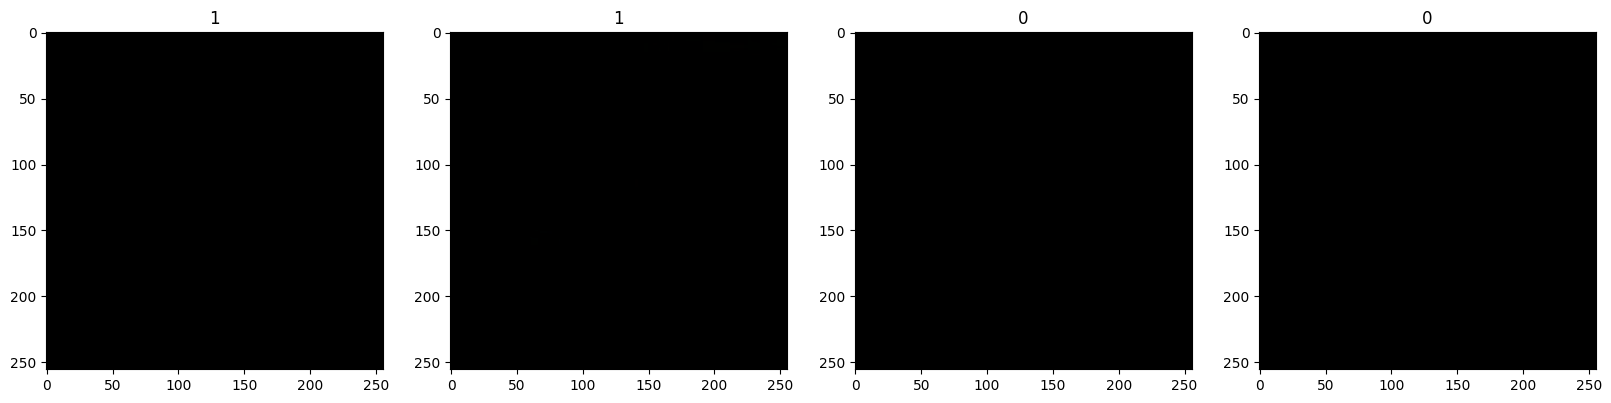

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# Class 0 : Trucks
# Class 1 : Cars

4. Scale Data

In [22]:
# RGB'de değerlendirmeler 0 ile 255 arasında oluyor (min: 0, max: 255) Eğer 255'e bölersek 0 ile 1 arasına alırız. Böylece işlem yükünü azaltmış oluruz.
# Burada map metodu ile değerleri 0 ile 1 arasına alıyoruz.
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.36409312, 0.5405637 , 0.75625   ],
          [0.3686562 , 0.54512674, 0.76081306],
          [0.36618987, 0.54658204, 0.7505036 ],
          ...,
          [0.39969364, 0.5918505 , 0.81145835],
          [0.4033088 , 0.59546566, 0.81507355],
          [0.4       , 0.5921569 , 0.8117647 ]],
 
         [[0.38455883, 0.564951  , 0.76887256],
          [0.37830883, 0.558701  , 0.76262254],
          [0.38069853, 0.5610907 , 0.76501226],
          ...,
          [0.41568628, 0.6       , 0.81960785],
          [0.41568628, 0.6       , 0.81960785],
          [0.41568628, 0.6       , 0.81960785]],
 
         [[0.39823645, 0.5677217 , 0.76600605],
          [0.38449755, 0.55398285, 0.7522672 ],
          [0.3882353 , 0.5686275 , 0.7647059 ],
          ...,
          [0.42438725, 0.6069853 , 0.827451  ],
          [0.41960785, 0.6022059 , 0.8226716 ],
          [0.42438725, 0.6069853 , 0.827451  ]],
 
         ...,
 
         [[0.37560892, 0.25777802, 0.14779028],
          [0.47919

5. Split Data

In [28]:
train_size = int(len(data)*.7) # Training için verinin %70'i
val_size = int(len(data)*.2) # Validation için %20'si
test_size = int(len(data)*.1) # Test için %10'u

In [31]:
test_size

1

In [32]:
train = data.take(train_size) # Verisetinin ilk 4 parçasını alıyoruz
val = data.skip(train_size).take(val_size) # Verisetinin ilk 4 parçasını pas geçiyoruz ve sonraki 2 parçasını alıyoruz.
test = data.skip(train_size+val_size).take(test_size) # Verisetinin ilk 4 + 2 kısmını pas geçiyoruz ve sonraki 1 yani son parçasını alıyoruz.

6. Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [34]:
model = Sequential()

In [35]:
# Input katmanını oluşturuyoruz.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# Maximum Pooling ile pooling katmanlarını oluşturuyoruz. Bu katmanla, önceki evrişimli katmanın baskın özelliklerini öne çıkartırız.
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# Flatten katmanı ile filtrelerden elde edilen özellik haritasını tek vektöre çeviriyoruz.
model.add(Flatten())
# Tam bağlı (Dense) katmanını oluşturuyoruz.
model.add(Dense(256, activation='relu'))
# Output katmanı
model.add(Dense(1, activation='sigmoid'))

In [36]:
# Adam optimizasyon algoritmasını kullanacağız.
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

7. Train

In [38]:
logdir='logs'

In [40]:
# Checkpointlerden yararlanmak için faydalı
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
# Eğitimi başlat
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 10s 973ms/step - loss: 1.0832 - accuracy: 0.5491 - val_loss: 0.7041 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 8s 863ms/step - loss: 0.6936 - accuracy: 0.4866 - val_loss: 0.6895 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 8s 868ms/step - loss: 0.6893 - accuracy: 0.5268 - val_loss: 0.6859 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.6801 - accuracy: 0.6652 - val_loss: 0.6645 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 9s 949ms/step - loss: 0.6586 - accuracy: 0.7143 - val_loss: 0.6479 - val_accuracy: 0.6094
Epoch 6/20
7/7 [==============================] - 8s 910ms/step - loss: 0.5898 - accuracy: 0.7500 - val_loss: 0.5275 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.5241 - accuracy: 0.7679 - val_loss: 0.5206 - val_accuracy: 0.6875
Epoch 8/20
7/7 [=======

8. Plot Performance

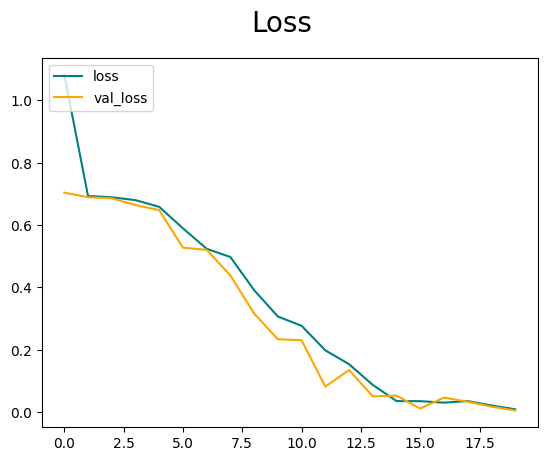

In [42]:
# Loss değerlerinin değişimine dair grafik
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

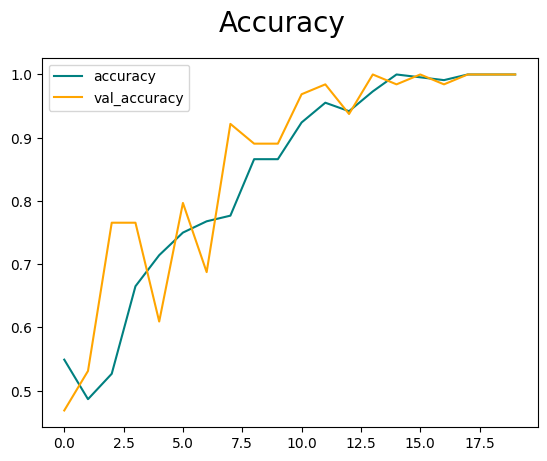

In [43]:
# Doğruluk (Accuracy) değerlerinin değişime dair grafik
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 361ms/step


In [47]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy: 1.0


10. Test

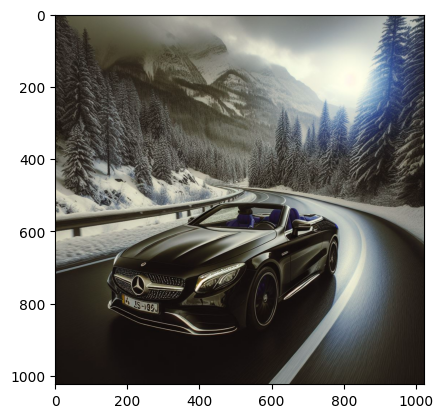

In [66]:
img = cv2.imread('test/car.jpeg')
plt.imshow(img)
plt.show()

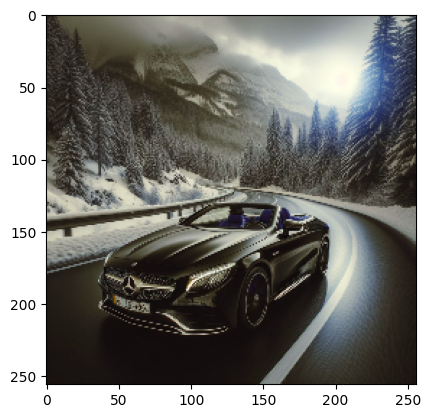

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [69]:
yhat

array([[0.8512256]], dtype=float32)

In [70]:
if yhat > 0.5: 
    print(f'Predicted class is Car')
else:
    print(f'Predicted class is Truck')

Predicted class is Car


11. Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','vehicleclassifier.keras'))